In [1]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as p

In [2]:
data = pd.read_csv("../data/train.csv", index_col="id", parse_dates=["fecha"]).reset_index()
data["tipodepropiedad"] = data["tipodepropiedad"].map(lambda x: str(x).lower())


In [3]:
precios_dolares = pd.read_csv('../data/precios_en_dolares.csv')

In [4]:
data = data.merge(precios_dolares, how='left')
del precios_dolares

In [5]:
#uso categorías de Lucio
tipo_vivienda = ["apartamento", "casa en condominio", "casa",
                 "villa", "duplex", "departamento compartido", "hospedaje", "quinta vacacional"]
tipo_comercial = ["terreno comercial", "local comercial", "oficina comercial", 
                  "local en centro comercial", "bodega comercial", "inmuebles productivos urbanos"]

tipo_inversion = ["casa uso de suelo", "terreno", "edificio", "huerta", "lote", "garage", "otros", "nave industrial",  "rancho"]
undefined = ["terreno", "edificio", "casa uso de suelo", "otros", "nave industrial", "rancho", "nan", 
             "huerta", "lote", "garage"]  

In [6]:
def get_ancester_category(tipo_de_propiedad):
    if (tipo_de_propiedad in tipo_inversion): return "inversion"

    if (tipo_de_propiedad in tipo_comercial): return "comercial"

    if (tipo_de_propiedad in tipo_vivienda): return "vivienda"

    return "undefined"

In [7]:
data["categoria_padre"] = data["tipodepropiedad"].apply(lambda x: get_ancester_category(x))

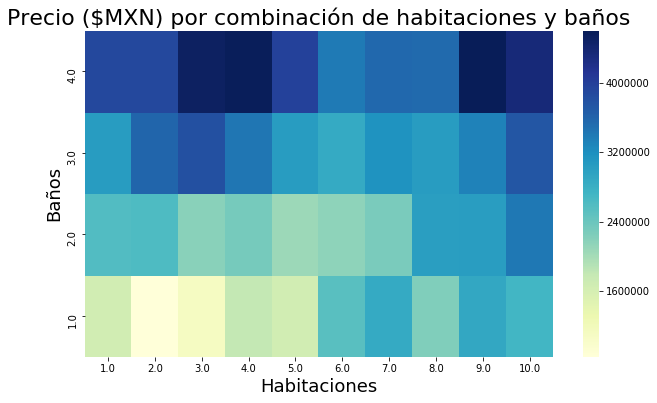

In [8]:
habitacionesbaños_for_heatmap = data.pivot_table(index='banos', columns='habitaciones', values='precio', aggfunc='mean')
p.figure(figsize=(10.5, 6))
g = sb.heatmap(habitacionesbaños_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Precio ($MXN) por combinación de habitaciones y baños", fontsize=22)
g.set_xlabel("Habitaciones",fontsize=18)
g.set_ylabel("Baños", fontsize=18)
p.savefig('img/heatmap_preciomxn_vs_cant_hab_banos.png')

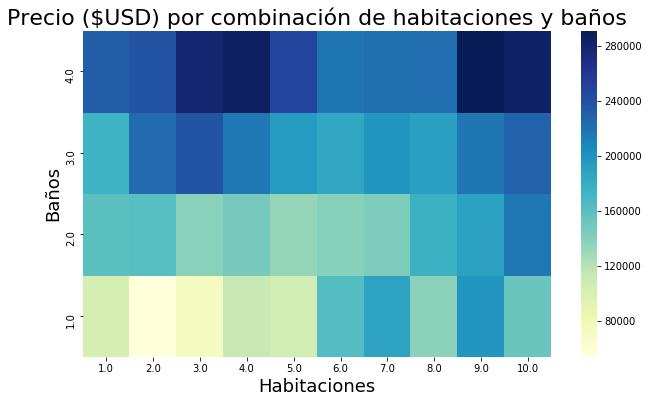

In [9]:
habitacionesbaños_for_heatmap = data.pivot_table(index='banos', columns='habitaciones', values='precio_usd', aggfunc='mean')
p.figure(figsize=(10.5, 6))
g = sb.heatmap(habitacionesbaños_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Precio ($USD) por combinación de habitaciones y baños", fontsize=22)
g.set_xlabel("Habitaciones",fontsize=18)
g.set_ylabel("Baños", fontsize=18)
p.savefig('img/heatmap_preciousd_vs_cant_hab_banos.png')

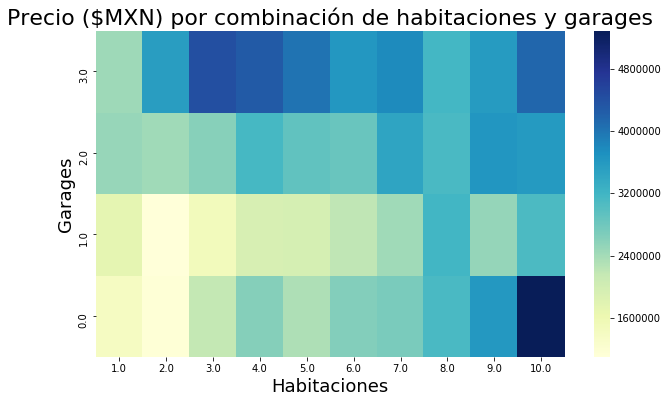

In [10]:
habitacionesbaños_for_heatmap = data.pivot_table(index='garages', columns='habitaciones', values='precio', aggfunc='mean')
p.figure(figsize=(10.5, 6))
g = sb.heatmap(habitacionesbaños_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Precio ($MXN) por combinación de habitaciones y garages", fontsize=22)
g.set_xlabel("Habitaciones",fontsize=18)
g.set_ylabel("Garages", fontsize=18)
p.savefig('img/heatmap_preciomxn_vs_cant_hab_garages.png')

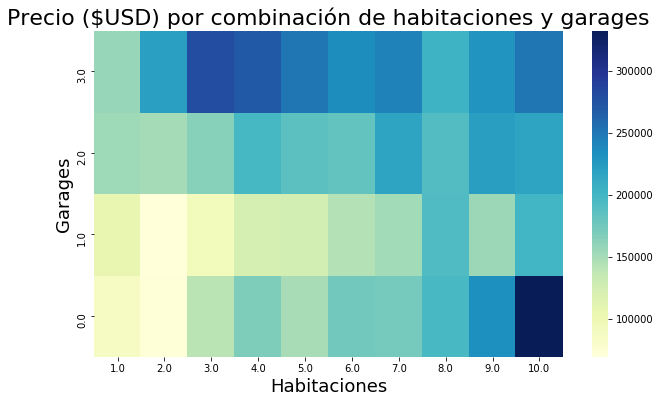

In [11]:
habitacionesbaños_for_heatmap = data.pivot_table(index='garages', columns='habitaciones', values='precio_usd', aggfunc='mean')
p.figure(figsize=(10.5, 6))
g = sb.heatmap(habitacionesbaños_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Precio ($USD) por combinación de habitaciones y garages", fontsize=22)
g.set_xlabel("Habitaciones",fontsize=18)
g.set_ylabel("Garages", fontsize=18)
p.savefig('img/heatmap_preciousd_vs_cant_hab_garages.png')

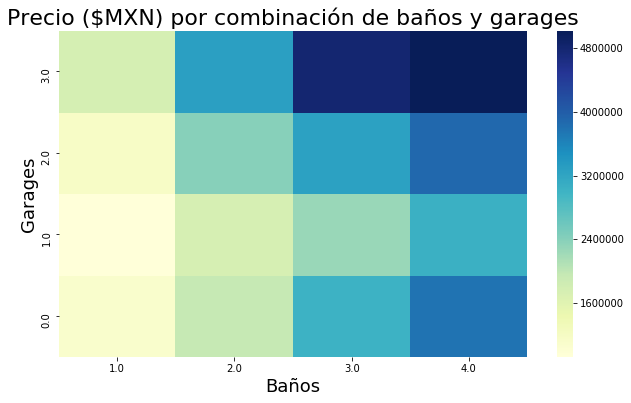

In [12]:
habitacionesbaños_for_heatmap = data.pivot_table(index='garages', columns='banos', values='precio', aggfunc='mean')
p.figure(figsize=(10.5, 6))
g = sb.heatmap(habitacionesbaños_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Precio ($MXN) por combinación de baños y garages", fontsize=22)
g.set_xlabel("Baños",fontsize=18)
g.set_ylabel("Garages", fontsize=18)
p.savefig('img/heatmap_preciomxn_vs_cant_banos_garages.png')

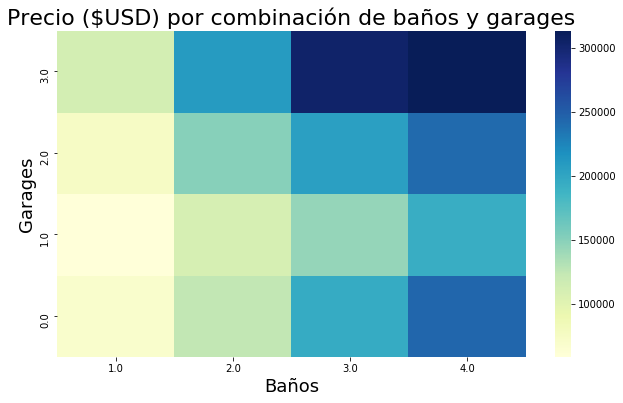

In [13]:
habitacionesbaños_for_heatmap = data.pivot_table(index='garages', columns='banos', values='precio_usd', aggfunc='mean')
p.figure(figsize=(10.5, 6))
g = sb.heatmap(habitacionesbaños_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Precio ($USD) por combinación de baños y garages", fontsize=22)
g.set_xlabel("Baños",fontsize=18)
g.set_ylabel("Garages", fontsize=18)
p.savefig('img/heatmap_preciousd_vs_cant_banos_garages.png')

# Habitaciones y baños en vivienda

Text(33.0, 0.5, 'Baños')

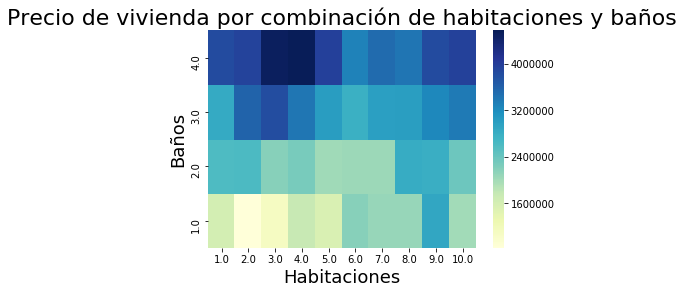

In [14]:
viviendas = data[data['categoria_padre'] == 'vivienda']
#habitacionesbaños_for_heatmap = data[data['categoria_padre'] == 'vivienda'].pivot_table(index='banos', columns='habitaciones', values='precio', aggfunc='mean')
habitacionesbaños_for_heatmap = viviendas.pivot_table(index='banos', columns='habitaciones', values='precio', aggfunc='mean')
g = sb.heatmap(habitacionesbaños_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Precio de vivienda por combinación de habitaciones y baños", fontsize=22)
g.set_xlabel("Habitaciones",fontsize=18)
g.set_ylabel("Baños", fontsize=18)

##Habitcicones y garages en vivienda

Text(33.0, 0.5, 'Garage')

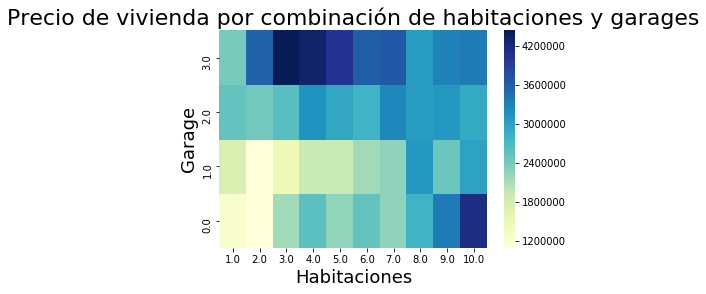

In [15]:
habitaciones_garages_for_heatmap = viviendas.pivot_table(index='garages', columns='habitaciones', values='precio', aggfunc='mean')
g = sb.heatmap(habitaciones_garages_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Precio de vivienda por combinación de habitaciones y garages", fontsize=22)
g.set_xlabel("Habitaciones",fontsize=18)
g.set_ylabel("Garage", fontsize=18)

##Distribución por categoría según precio

In [16]:
#cuantiles = data.quantile([0.2, 0.4, 0.6, 0.8])
cuantiles_precio = data['precio'].quantile([0.25, 0.5, 0.75])
datos = data.loc[data['precio']< cuantiles_precio[0.25]]
datos.shape

(60000, 25)

Text(0, 0.5, 'Frecuencia')

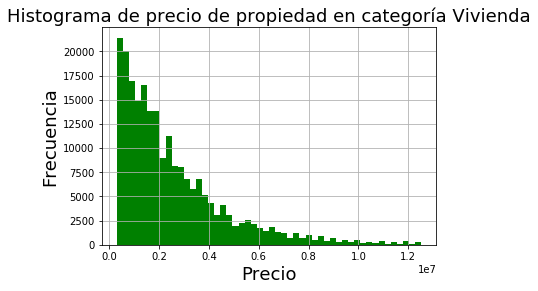

In [17]:
g = viviendas['precio'].plot.hist(bins=50, color='green', grid=True)
g.set_title("Histograma de precio de propiedad en categoría Vivienda", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

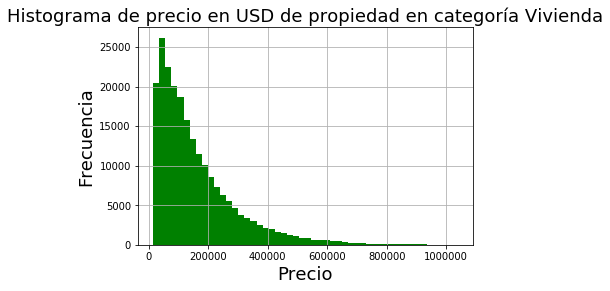

In [18]:
g = viviendas['precio_usd'].plot.hist(bins=50, color='green', grid=True)
g.set_title("Histograma de precio en USD de propiedad en categoría Vivienda", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

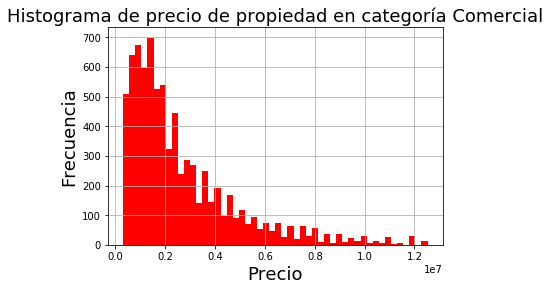

In [19]:
comercios = data[data['categoria_padre'] == 'comercial']
g = comercios['precio'].plot.hist(bins=50, color='red', grid=True)
g.set_title("Histograma de precio de propiedad en categoría Comercial", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

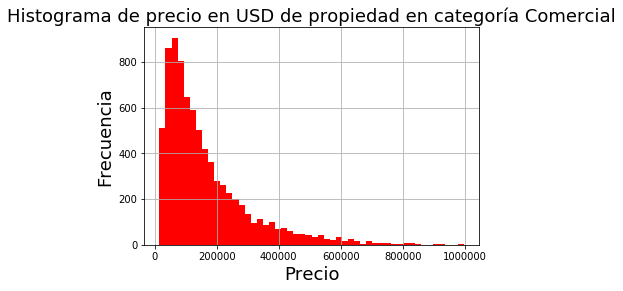

In [20]:
comercios = data[data['categoria_padre'] == 'comercial']
g = comercios['precio_usd'].plot.hist(bins=50, color='red', grid=True)
g.set_title("Histograma de precio en USD de propiedad en categoría Comercial", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

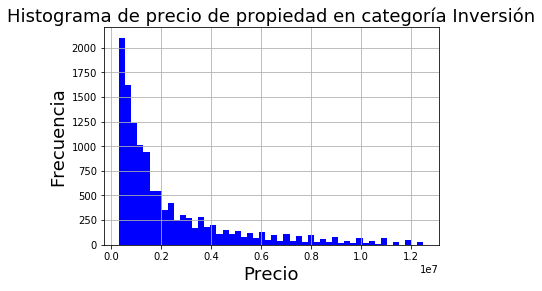

In [21]:
inversion = data[data['categoria_padre'] == 'inversion']
g = inversion['precio'].plot.hist(bins=50, color='blue', grid=True)
g.set_title("Histograma de precio de propiedad en categoría Inversión", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

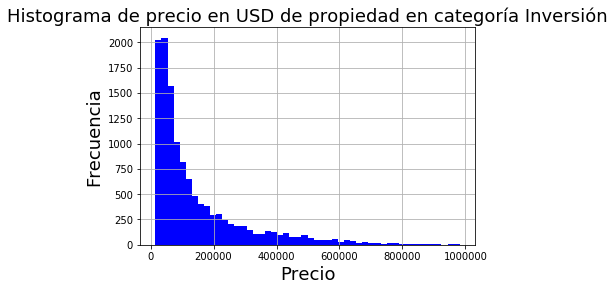

In [22]:
inversion = data[data['categoria_padre'] == 'inversion']
g = inversion['precio_usd'].plot.hist(bins=50, color='blue', grid=True)
g.set_title("Histograma de precio en USD de propiedad en categoría Inversión", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

In [23]:
undefined = data[data['categoria_padre'] == 'undefined']

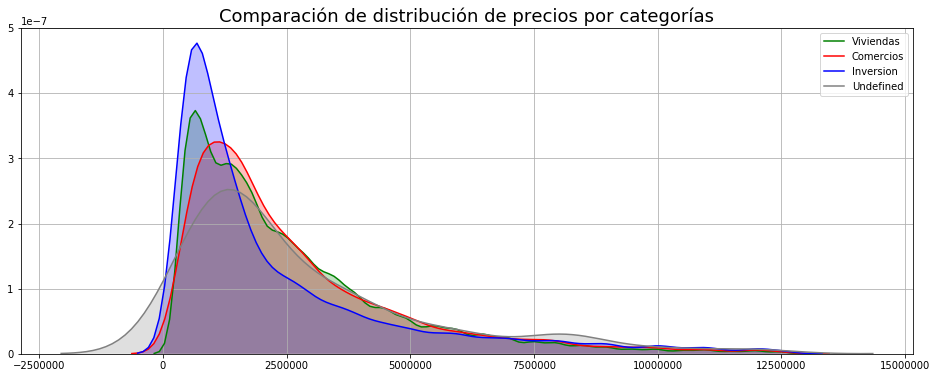

In [24]:
p.figure(figsize=(16, 6))
#g = sb.distplot(viviendas['precio'], color='blue', label='pledged (log)')
#g = sb.distplot(comercios['precio'], color='orange', label='goal (log)')
#g = sb.distplot(inversion['precio'], color='green', label='goal (log)')
g = sb.kdeplot(viviendas['precio'], color="green", shade=True, label='Viviendas')
g = sb.kdeplot(comercios['precio'], color="red", shade=True, label='Comercios')
g = sb.kdeplot(inversion['precio'], color="blue", shade=True, label='Inversion')
g = sb.kdeplot(undefined['precio'], color="grey", shade=True, label='Undefined')
g.set_title("Comparación de distribución de precios por categorías", fontsize=18)
g.set_title("Comparación de distribución de precios por categorías", fontsize=18)
g.grid(True)
p.ticklabel_format(style='plain', axis='x')

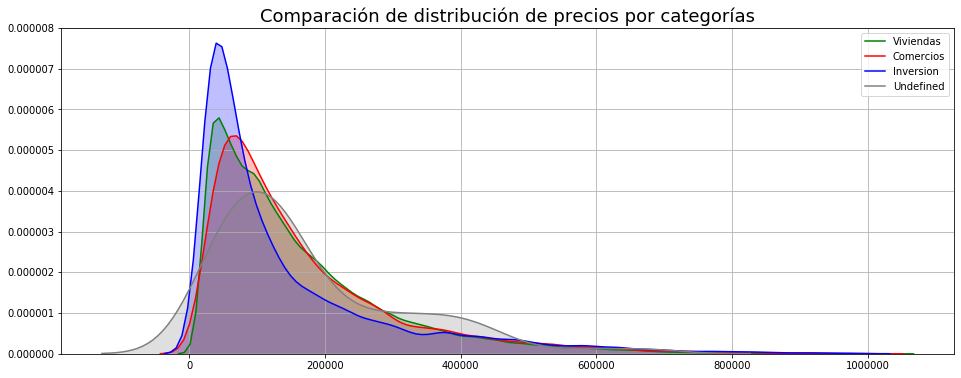

In [25]:
p.figure(figsize=(16, 6))
#g = sb.distplot(viviendas['precio_usd'], color='blue', label='pledged (log)', hist=False)
#g = sb.distplot(comercios['precio_usd'], color='orange', label='goal (log)', hist=False)
#g = sb.distplot(inversion['precio_usd'], color='green', label='goal (log)', hist=False)
g = sb.kdeplot(viviendas['precio_usd'], color="green", shade=True, label='Viviendas')
g = sb.kdeplot(comercios['precio_usd'], color="red", shade=True, label='Comercios')
g = sb.kdeplot(inversion['precio_usd'], color="blue", shade=True, label='Inversion')
g = sb.kdeplot(undefined['precio_usd'], color="grey", shade=True, label='Undefined')
g.set_title("Comparación de distribución de precios por categorías", fontsize=18)
g.grid(True)
p.ticklabel_format(style='plain', axis='x')

Text(0, 0.5, 'Precio')

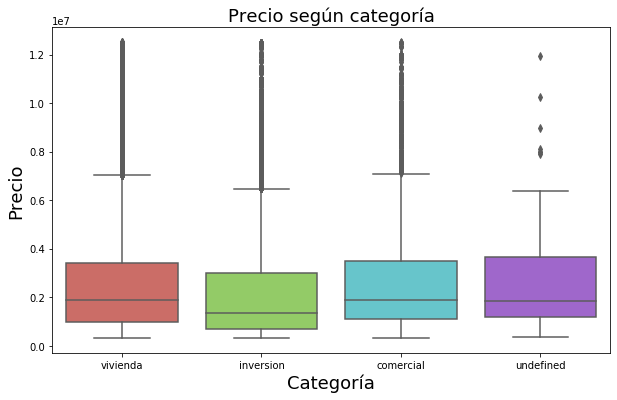

In [26]:
p.figure(figsize=(10, 6))
g = sb.boxplot(x="categoria_padre", y="precio", 
                     data=data, palette="hls")
g.set_title("Precio según categoría", fontsize=18)
g.set_xlabel("Categoría", fontsize=18)
g.set_ylabel("Precio", fontsize=18)

Text(0, 0.5, 'Precio')

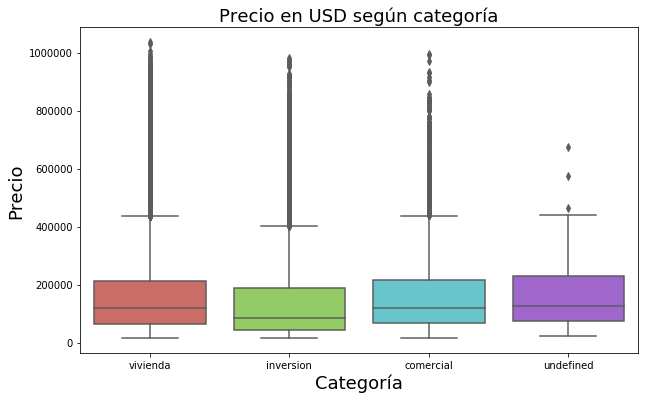

In [27]:
p.figure(figsize=(10, 6))
g = sb.boxplot(x="categoria_padre", y="precio_usd", 
                     data=data, palette="hls")
g.set_title("Precio en USD según categoría", fontsize=18)
g.set_xlabel("Categoría", fontsize=18)
g.set_ylabel("Precio", fontsize=18)

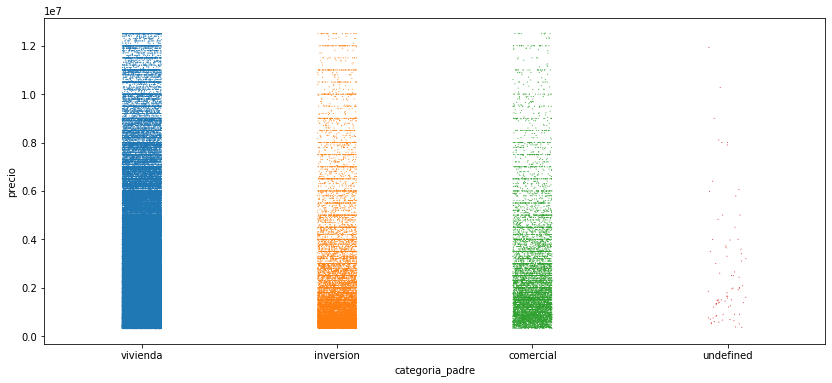

In [28]:
p.figure(figsize=(14, 6))
g = sb.stripplot(x="categoria_padre", y="precio", data=data, jitter=True, size = 1)

In [29]:
cuantiles_precio[0.25]

952772.5

In [30]:
cuantiles_precio[0.5]

1850000.0

In [31]:
cuantiles_precio[0.75]

3390000.0

In [32]:
def get_cuantil(precio, cuantiles):
    if precio < cuantiles[0.25]:
        return "<"+str(cuantiles[0.25])
    if (precio >= cuantiles[0.25]) and (precio < cuantiles[0.5]):
        return "["+str(cuantiles[0.25])+" , "+str(cuantiles[0.5])+")"
    if (precio >= cuantiles[0.5]) and (precio < cuantiles[0.75]):
        return "["+str(cuantiles[0.5])+" , "+str(cuantiles[0.75])+")"
    if (precio >= cuantiles[0.75]):
        return ">"+str(cuantiles[0.75])

In [33]:
data["cuantil"] = data["precio"].apply(lambda x: get_cuantil(x, cuantiles_precio))

Text(0, 0.5, 'Cantidad de propiedades')

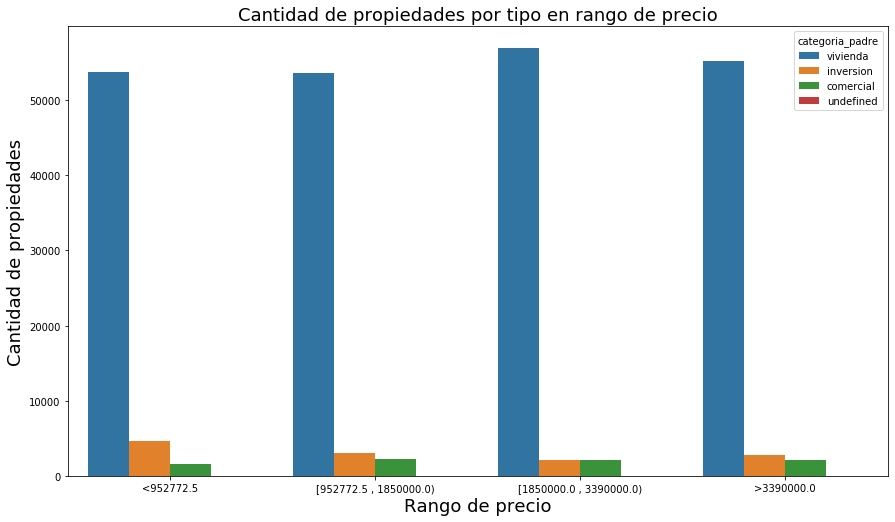

In [34]:
fig,ax = p.subplots()
fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = "cuantil", hue = "categoria_padre", data = data, ax = ax,order=['<952772.5','[952772.5 , 1850000.0)','[1850000.0 , 3390000.0)','>3390000.0'])
g.set_title("Cantidad de propiedades por tipo en rango de precio", fontsize=18)
g.set_xlabel("Rango de precio", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)

In [35]:
cantidad_por_categoria = data['categoria_padre'].value_counts()

In [36]:
data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_usd,categoria_padre,cuantil
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0,133740.0,vivienda,"[1850000.0 , 3390000.0)"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0,274625.0,vivienda,>3390000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0,72718.0,vivienda,"[952772.5 , 1850000.0)"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0,49080.0,vivienda,<952772.5
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0,60684.0,vivienda,"[952772.5 , 1850000.0)"


In [37]:
y1 = [data.loc[(data['categoria_padre'] == "vivienda") & (data['cuantil'] == "<952772.5")].shape[0]]
y1.append(data.loc[(data['categoria_padre'] == "vivienda") & (data['cuantil'] == "[952772.5 , 1850000.0)")].shape[0])
y1.append(data.loc[(data['categoria_padre'] == "vivienda") & (data['cuantil'] == "[1850000.0 , 3390000.0)")].shape[0])
y1.append(data.loc[(data['categoria_padre'] == "vivienda") & (data['cuantil'] == ">3390000.0")].shape[0])
y2 = [data.loc[(data['categoria_padre'] == "comercial") & (data['cuantil'] == "<952772.5")].shape[0]]
y2.append(data.loc[(data['categoria_padre'] == "comercial") & (data['cuantil'] == "[952772.5 , 1850000.0)")].shape[0])
y2.append(data.loc[(data['categoria_padre'] == "comercial") & (data['cuantil'] == "[1850000.0 , 3390000.0)")].shape[0])
y2.append(data.loc[(data['categoria_padre'] == "comercial") & (data['cuantil'] == ">3390000.0")].shape[0])
y3 = [data.loc[(data['categoria_padre'] == "inversion") & (data['cuantil'] == "<952772.5")].shape[0]]
y3.append(data.loc[(data['categoria_padre'] == "inversion") & (data['cuantil'] == "[952772.5 , 1850000.0)")].shape[0])
y3.append(data.loc[(data['categoria_padre'] == "inversion") & (data['cuantil'] == "[1850000.0 , 3390000.0)")].shape[0])
y3.append(data.loc[(data['categoria_padre'] == "inversion") & (data['cuantil'] == ">3390000.0")].shape[0])

In [38]:
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)

In [39]:
# memo of sample number
snum = y1+y2+y3

# normalization
y1 = y1/snum*100
y2 = y2/snum*100
y3 = y3/snum*100

In [40]:
p.figure(figsize=(8,5))

# stack bars
p.bar(x, y1, label='Viviendas')
p.bar(x, y2 ,bottom=y1,label='Comercios')
p.bar(x, y3 ,bottom=y1+y2,label='Inversión')


p.ylim(0,110)

p.legend(bbox_to_anchor=(1.01,0.5), loc='center left')

NameError: name 'x' is not defined

<Figure size 576x360 with 0 Axes>

In [41]:
data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_usd,categoria_padre,cuantil
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0,133740.0,vivienda,"[1850000.0 , 3390000.0)"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0,274625.0,vivienda,>3390000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0,72718.0,vivienda,"[952772.5 , 1850000.0)"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0,49080.0,vivienda,<952772.5
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0,60684.0,vivienda,"[952772.5 , 1850000.0)"


In [42]:
data['precio_usd_hasta_200k'] = data.apply(lambda x: True if x['precio_usd'] <= 200e3 else False, axis=1)
data['precio_usd_entre_200k_y_400k'] = data.apply(lambda x: True if x['precio_usd'] > 200e3 and x['precio_usd'] <= 400e3 else False, axis=1)
data['precio_usd_entre_400k_y_600k'] = data.apply(lambda x: True if x['precio_usd'] > 400e3 and x['precio_usd'] <= 600e3 else False, axis=1)
data['precio_usd_mayor_a_600k'] = data.apply(lambda x: True if x['precio_usd'] > 600e3 else False, axis=1)

In [43]:
def extract_anio_mes(x):
    if x.month > 9:
        return str(x.year) + " " + str(x.month)
    return str(x.year) + " 0" + str(x.month)

In [44]:
data['anio_mes'] = data['fecha'].apply(lambda x: extract_anio_mes(x))

In [45]:
data['anio_mes'].head()

0    2015 08
1    2013 06
2    2015 10
3    2012 03
4    2016 06
Name: anio_mes, dtype: object

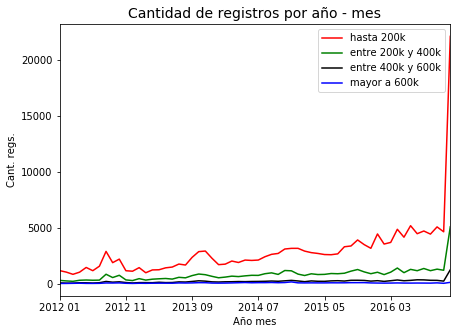

In [46]:
ax = data.loc[data['precio_usd_hasta_200k']==True].groupby('anio_mes').size().sort_index().plot(figsize=(7,5), title='asdf', color = 'red', label='hasta 200k')
ax = data.loc[data['precio_usd_entre_200k_y_400k']==True].groupby('anio_mes').size().sort_index().plot(figsize=(7,5), title='asdf', color = 'green', label='entre 200k y 400k')
ax = data.loc[data['precio_usd_entre_400k_y_600k']==True].groupby('anio_mes').size().sort_index().plot(figsize=(7,5), title='asdf', color = 'black', label='entre 400k y 600k')
ax = data.loc[data['precio_usd_mayor_a_600k']==True].groupby('anio_mes').size().sort_index().plot(figsize=(7,5), title='asdf', color = 'blue', label='mayor a 600k')
ax.set_title('Cantidad de registros por año - mes', fontdict={'fontsize':14})
ax.set_xlabel('Año mes')
ax.set_ylabel('Cant. regs.')
ax.legend()
p.savefig('img/cant_reg_anio_mes_segmentado_por_precio.png')

Text(0, 0.5, 'Cant. regs.')

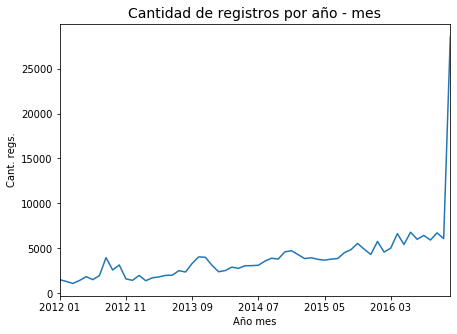

In [47]:
ax = data.groupby('anio_mes').size().sort_index().plot(figsize=(7,5), title='asdf')
ax.set_title('Cantidad de registros por año - mes', fontdict={'fontsize':14})
ax.set_xlabel('Año mes')
ax.set_ylabel('Cant. regs.')

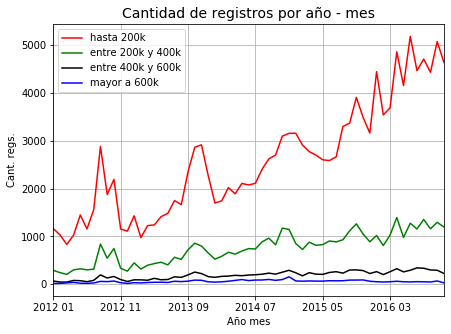

In [48]:
datos_sin_dic_2016 = data.loc[~(data['anio_mes'] == '2016 12')]
ax = datos_sin_dic_2016.loc[datos_sin_dic_2016['precio_usd_hasta_200k']==True].groupby('anio_mes').size().sort_index().plot(figsize=(7,5), title='asdf', color = 'red', label='hasta 200k', grid = 'minor')
ax = datos_sin_dic_2016.loc[datos_sin_dic_2016['precio_usd_entre_200k_y_400k']==True].groupby('anio_mes').size().sort_index().plot(figsize=(7,5), title='asdf', color = 'green', label='entre 200k y 400k', grid = 'minor')
ax = datos_sin_dic_2016.loc[datos_sin_dic_2016['precio_usd_entre_400k_y_600k']==True].groupby('anio_mes').size().sort_index().plot(figsize=(7,5), title='asdf', color = 'black', label='entre 400k y 600k', grid = 'minor')
ax = datos_sin_dic_2016.loc[datos_sin_dic_2016['precio_usd_mayor_a_600k']==True].groupby('anio_mes').size().sort_index().plot(figsize=(7,5), title='asdf', color = 'blue', label='mayor a 600k', grid = 'minor')
ax.set_title('Cantidad de registros por año - mes', fontdict={'fontsize':14})
ax.set_xlabel('Año mes')
ax.set_ylabel('Cant. regs.')
ax.legend()
p.savefig('img/cant_reg_anio_mes_sin_dic_2016_segmentado_por_precio.png')

Text(0, 0.5, 'Cant. regs.')

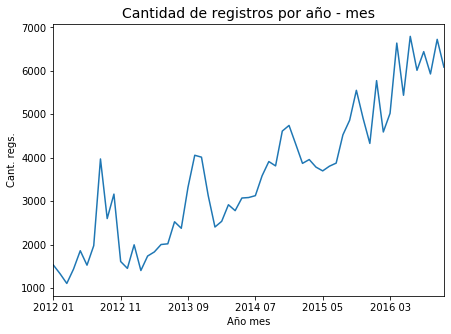

In [49]:
ax = data.loc[~(data['anio_mes'] == '2016 12')].groupby('anio_mes').size().sort_index().plot(figsize=(7,5), title='asdf')
ax.set_title('Cantidad de registros por año - mes', fontdict={'fontsize':14})
ax.set_xlabel('Año mes')
ax.set_ylabel('Cant. regs.')

In [50]:
data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,centroscomercialescercanos,precio,precio_usd,categoria_padre,cuantil,precio_usd_hasta_200k,precio_usd_entre_200k_y_400k,precio_usd_entre_400k_y_600k,precio_usd_mayor_a_600k,anio_mes
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,0.0,2273000.0,133740.0,vivienda,"[1850000.0 , 3390000.0)",True,False,False,False,2015 08
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,1.0,3600000.0,274625.0,vivienda,>3390000.0,False,True,False,False,2013 06
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,0.0,1200000.0,72718.0,vivienda,"[952772.5 , 1850000.0)",True,False,False,False,2015 10
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,1.0,650000.0,49080.0,vivienda,<952772.5,True,False,False,False,2012 03
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,0.0,1150000.0,60684.0,vivienda,"[952772.5 , 1850000.0)",True,False,False,False,2016 06


In [51]:
##Análisis por día y hora

In [52]:
data['fecha'][0]

Timestamp('2015-08-23 00:00:00')

In [53]:
def obtener_dia_semana(weekday):
    if weekday == 0:
        return "Lunes"
    elif weekday == 1:
        return "Martes"
    elif weekday == 2:
        return "Miércoles"
    elif weekday == 3:
        return "Jueves"
    elif weekday == 4:
        return "Viernes"
    elif weekday == 5:
        return "Sábado"
    elif weekday == 6:
        return "Domingo"

In [54]:
data['diasemana'] = data['fecha'].apply(lambda x: obtener_dia_semana(x.weekday()))

In [55]:
#data.groupby(data['fecha'].apply(lambda x: x.weekday())).groups

Text(0, 0.5, 'Cantidad de propiedades')

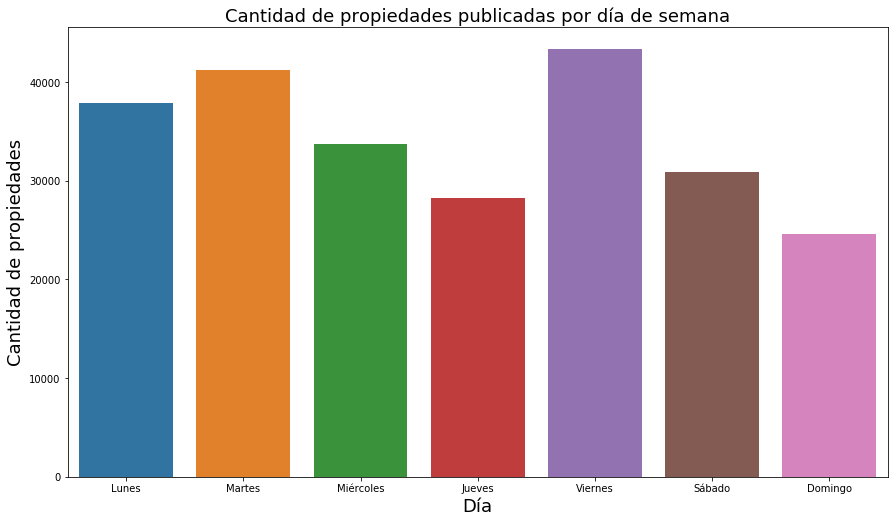

In [56]:
fig,ax = p.subplots()
fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = data['diasemana'], data = data, ax = ax, order=["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"])
g.set_title("Cantidad de propiedades publicadas por día de semana", fontsize=18)
g.set_xlabel("Día", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)

In [57]:
data['fecha'][0].month_name()

'August'

In [58]:
import locale
locale.setlocale(locale.LC_ALL, 'es_ES')
import calendar
#locale.setlocale(locale.LC_TIME, 'es_ES')

In [59]:
data['fecha'][0].month_name()

'August'

In [60]:
data['fecha'][0].day_name()

'Sunday'

In [61]:
calendar.month_name[1]

'enero'

In [62]:
calendar.month_name[data['fecha'][0].month]

'agosto'

In [63]:
data['mes'] = data['fecha'].apply(lambda x: calendar.month_name[x.month])

In [64]:
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]

Text(0, 0.5, 'Cantidad de propiedades')

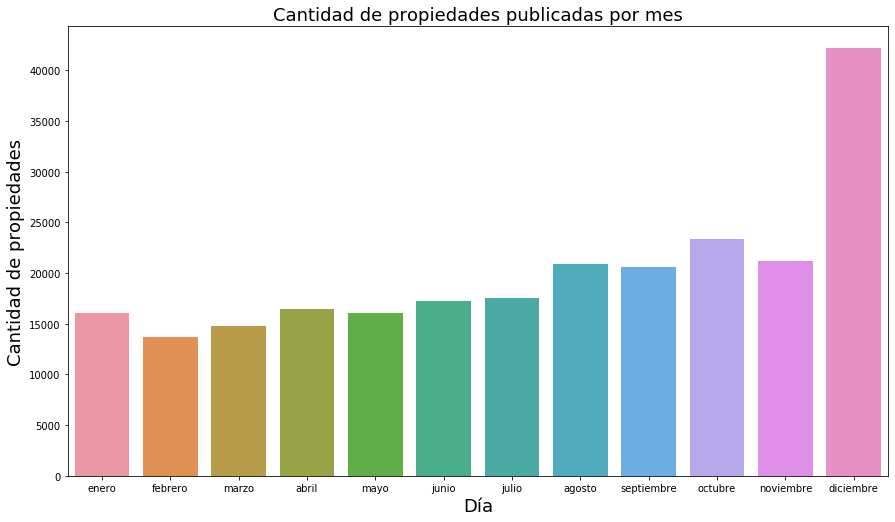

In [65]:
fig,ax = p.subplots()
fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = data['fecha'].apply(lambda x: calendar.month_name[x.month]), data = data, ax = ax, order = meses)
g.set_title("Cantidad de propiedades publicadas por mes", fontsize=18)
g.set_xlabel("Día", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)

In [66]:
datos_sin_2016 = data.loc[data['fecha'].apply(lambda x: x.year != 2016)]

Text(0, 0.5, 'Cantidad de propiedades')

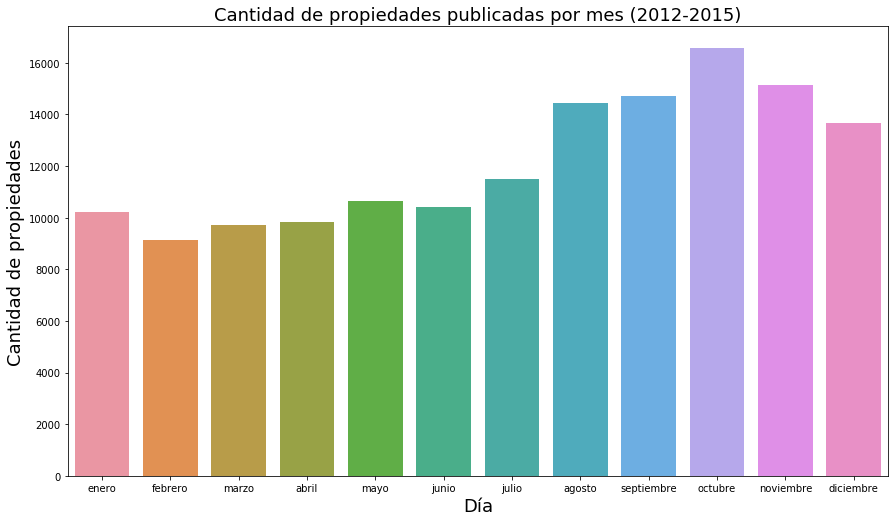

In [67]:
fig,ax = p.subplots()
fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = datos_sin_2016['fecha'].apply(lambda x: calendar.month_name[x.month]), data = datos_sin_2016, ax = ax, order = meses)
g.set_title("Cantidad de propiedades publicadas por mes (2012-2015)", fontsize=18)
g.set_xlabel("Día", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)

In [68]:
def obtener_categoria_precio(x):
    if x <= 200e3:
        return 'precio_usd_hasta_200k'
    elif x > 200e3 and x <= 400e3:
        return 'precio_usd_entre_200k_y_400k'
    elif x > 400e3 and x <= 600e3:
        return 'precio_usd_entre_400k_y_600k'
    elif x > 600e3:
        return 'precio_usd_mayor_a_600k'

In [69]:
data['categoria_precio'] = data['precio_usd'].apply(lambda x: obtener_categoria_precio(x))

Text(0, 0.5, 'Cantidad de propiedades')

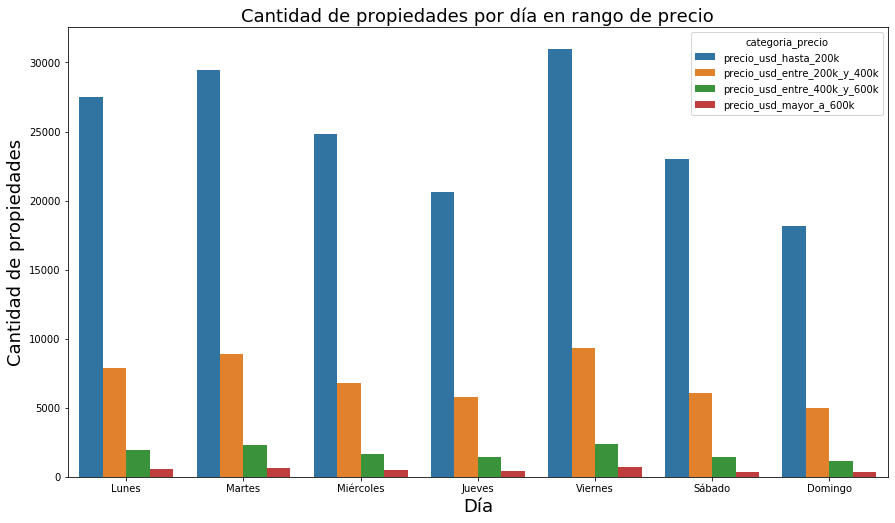

In [70]:
fig,ax = p.subplots()
fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = "diasemana", hue = "categoria_precio", data = data, ax = ax, order = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"])
g.set_title("Cantidad de propiedades por día en rango de precio", fontsize=18)
g.set_xlabel("Día", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)

Text(0, 0.5, 'Cantidad de propiedades')

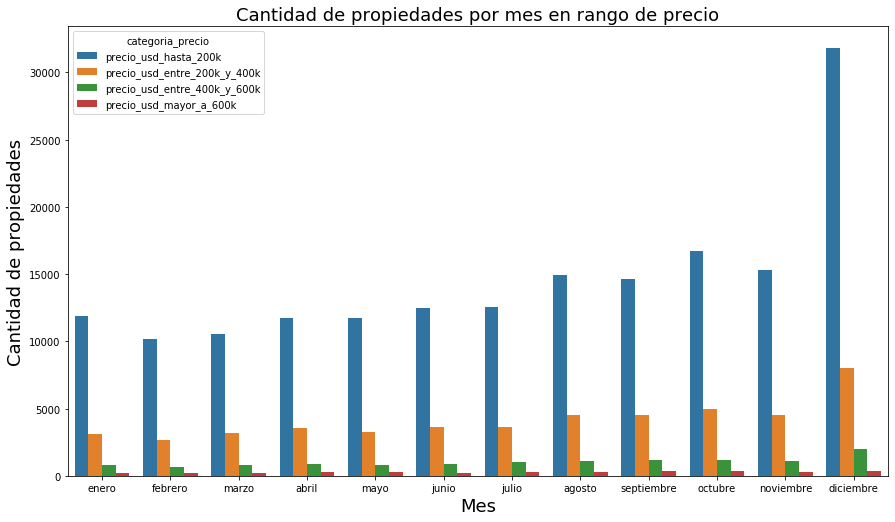

In [71]:
fig,ax = p.subplots()
fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = data['fecha'].apply(lambda x: calendar.month_name[x.month]), hue = "categoria_precio", data = data, ax = ax, order = meses)
g.set_title("Cantidad de propiedades por mes en rango de precio", fontsize=18)
g.set_xlabel("Mes", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)

Text(0, 0.5, 'Cantidad de propiedades')

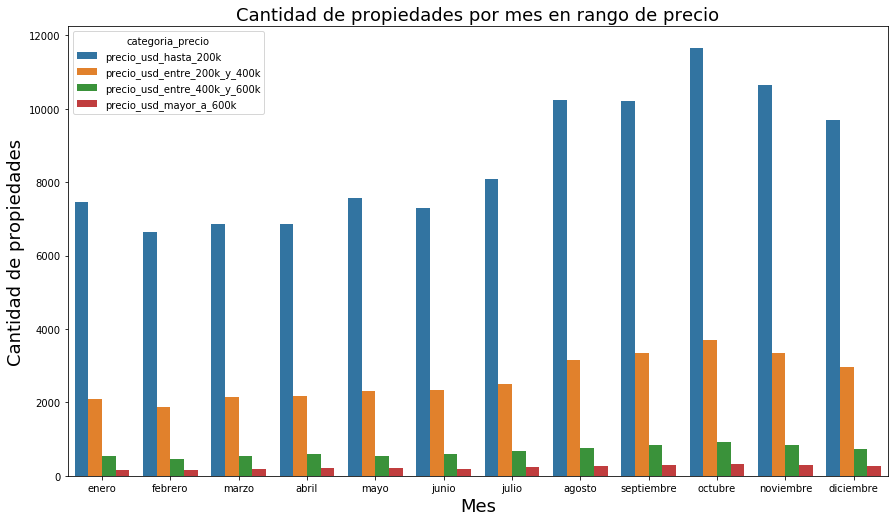

In [72]:
fig,ax = p.subplots()
fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = datos_sin_2016['fecha'].apply(lambda x: calendar.month_name[x.month]), hue = "categoria_precio", data = data, ax = ax, order = meses)
g.set_title("Cantidad de propiedades por mes en rango de precio", fontsize=18)
g.set_xlabel("Mes", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)

In [73]:
def obtener_quincena(x):
    if x <= 15:
        return 'Primera'
    elif x > 16:
        return 'Segunda'

In [74]:
obtener_quincena(data['fecha'][0].day)

'Segunda'

In [75]:
#data['diasemana'] = data['fecha'].apply(lambda x: obtener_dia_semana(x.weekday()))

In [76]:
data['quincena'] = data['fecha'].apply(lambda x: obtener_quincena(x.day))

Text(0, 0.5, 'Cantidad de propiedades')

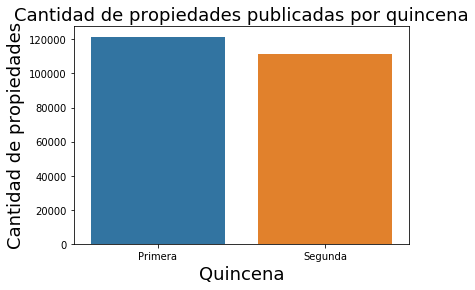

In [77]:
fig,ax = p.subplots()
#fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = data['quincena'], data = data, ax = ax, order = ['Primera','Segunda'])
g.set_title("Cantidad de propiedades publicadas por quincena", fontsize=18)
g.set_xlabel("Quincena", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)

Text(0, 0.5, 'Cantidad de propiedades')

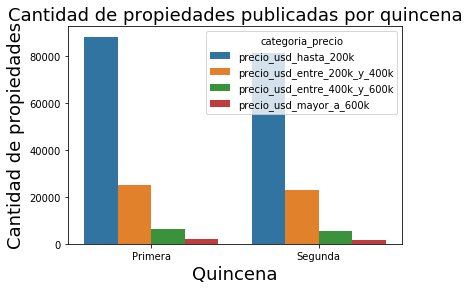

In [78]:
fig,ax = p.subplots()
#fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = data['quincena'], hue = 'categoria_precio', data = data, ax = ax, order = ['Primera','Segunda'])
g.set_title("Cantidad de propiedades publicadas por quincena", fontsize=18)
g.set_xlabel("Quincena", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)

In [79]:
def obtener_semana_del_mes(x):
    if x <=7:
        return 1
    elif x > 7 and x <= 14: 
        return 2
    elif x > 14 and x <= 21:
        return 3
    elif x > 22 and x <= 29:
        return 4
    else:
        return 5

In [80]:
data['semana_del_mes'] = data['fecha'].apply(lambda x: obtener_semana_del_mes(x.day))

Text(0, 0.5, 'Cantidad de propiedades')

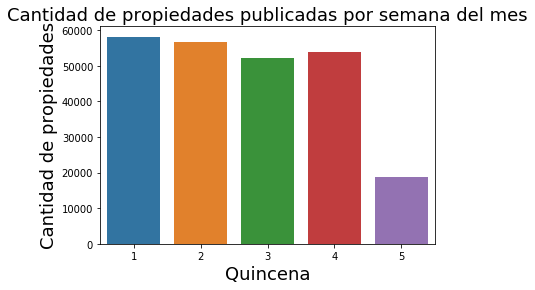

In [81]:
fig,ax = p.subplots()
#fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = data['semana_del_mes'], data = data, ax = ax)
g.set_title("Cantidad de propiedades publicadas por semana del mes", fontsize=18)
g.set_xlabel("Quincena", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)

Text(0, 0.5, 'Cantidad de propiedades')

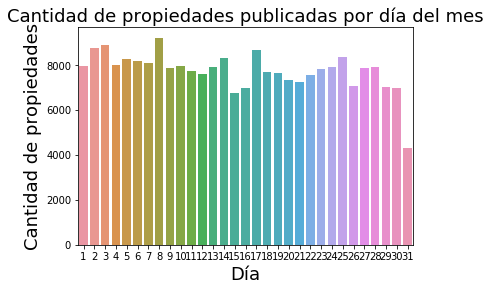

In [82]:
fig,ax = p.subplots()
#fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = data['fecha'].apply(lambda x: x.day), data = data, ax = ax)
g.set_title("Cantidad de propiedades publicadas por día del mes", fontsize=18)
g.set_xlabel("Día", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)